# Skin_Cancer_Detection using CNN

## The dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. The objective to build deep learning model to classify given query image into one of the 7 different classes of skin cancer.

#### Sourses:
Data: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

This the HAM10000 ("Human Against Machine with 10000 training images") dataset.It consists of 10015 dermatoscopicimages which are released as a training set for academic machine learning purposes and are publiclyavailable through the ISIC archive. This benchmark dataset can be used for machine learning and for comparisons with human experts.

It has 7 different classes of skin cancer which are listed below :
1. Melanocytic nevi
2. Melanoma
3. Benign keratosis-like lesions
4. Basal cell carcinoma
5. Actinic keratoses
6. Vascular lesions
7. Dermatofibroma

Here I will try to detect 7 different classes of skin cancer using Convolution Neural Network with keras tensorflow in backend and then analyse the result to see how the model can be useful in practical scenario.
We will move step by step process to classify 7 classes of cancer.

![](https://github.com/charanhu/Skin_Cancer_Detection_MNIST/blob/main/model_architecture.png?raw=true)

In this kernel I have followed following 14 steps for model building and evaluation which are as follows :

Step 1: Importing Essential Libraries

Step 2: Loading data and Making labels

Step 3: Train Test Split

Step 4: Exploratory data analysis (EDA)

Step 5: Model Building (CNN)

Step 6: Setting Optimizer & Annealing

Step 7: Fitting the model

Step 8: Model Evaluation

# Step 1: Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Step 2: Loading data and Making labels

In [2]:
df = pd.read_csv('hmnist_28_28_RGB.csv')


In [3]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


# Step 3: Train Test Split

In [4]:
fractions=np.array([0.8,0.2])

df=df.sample(frac=1)

train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [5]:
print(len(train_set))

8012


In [6]:
print(len(test_set))

2003


In [7]:
df.label.unique()

array([4, 2, 5, 6, 1, 0, 3], dtype=int64)

In [8]:
# reference: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/discussion/183083
classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         
    1:('bcc' , 'basal cell carcinoma'),
         
    2:('bkl', 'benign keratosis-like lesions'),
         
    3:('df', 'dermatofibroma'),
         
    4:('nv', ' melanocytic nevi'),
         
    5:('vasc', ' pyogenic granulomas and hemorrhage'),
         
    6:('mel', 'melanoma'),
}

In [9]:
y_train=train_set['label']

x_train=train_set.drop(columns=['label'])

y_test=test_set['label']

x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [10]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


# Step 4: Exploratory Data Analysis and Preprocessing

<AxesSubplot:xlabel='label', ylabel='count'>

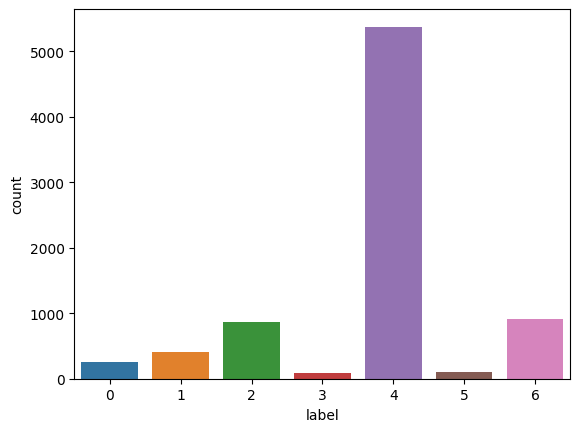

In [11]:
import seaborn as sns

sns.countplot(train_set['label'])

In [12]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

<AxesSubplot:xlabel='label', ylabel='count'>

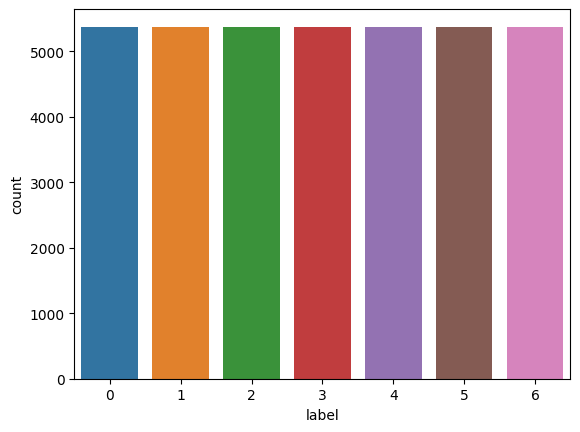

In [13]:
sns.countplot(y_train)

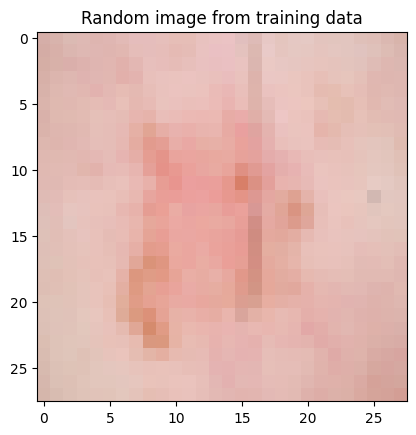

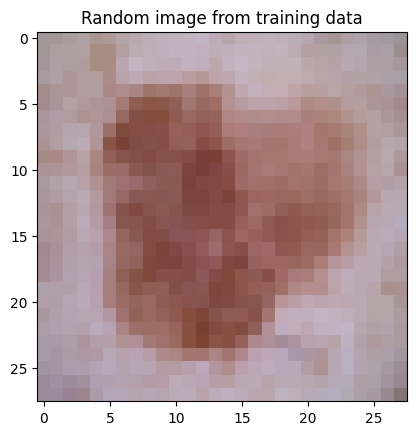

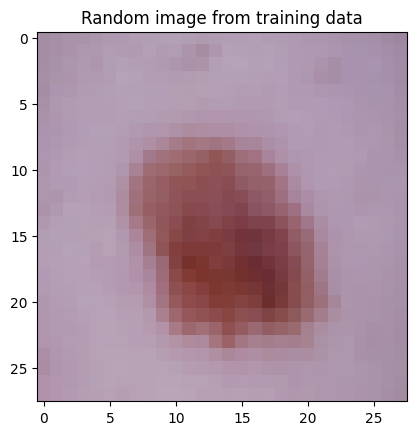

In [14]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# Step 5: Model Building (CNN)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [16]:
#https://keras.io/api/models/sequential/
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/merging_layers/add/
#https://keras.io/api/layers/convolution_layers/convolution2d
#https://keras.io/api/layers/convolution_layers/convolution2d
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization


%time 

model = Sequential()

model.add(Conv2D(16, 
                 kernel_size = (3,3), 
                 input_shape = (28, 28, 3), 
                 activation = 'relu', 
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(64, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(256, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: total: 0 ns
Wall time: 0 ns
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 

# Step 6: Setting Optimizer & Annealing

---



In [17]:
#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification

callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc', 
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [18]:
%time 

optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: total: 0 ns
Wall time: 0 ns


# Step 7: Fitting the model

In [19]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 10,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/10
236/236 [==============================] - 20s 75ms/step - loss: 1.1674 - accuracy: 0.5798 - val_loss: 2.5621 - val_accuracy: 0.1272
Epoch 2/10
236/236 [==============================] - 18s 74ms/step - loss: 0.4193 - accuracy: 0.8597 - val_loss: 1.9181 - val_accuracy: 0.2722
Epoch 3/10
236/236 [==============================] - 19s 79ms/step - loss: 0.2765 - accuracy: 0.9063 - val_loss: 1.5783 - val_accuracy: 0.4476
Epoch 4/10
236/236 [==============================] - 18s 78ms/step - loss: 0.2228 - accuracy: 0.9231 - val_loss: 1.1125 - val_accuracy: 0.5185
Epoch 5/10
236/236 [==============================] - 19s 79ms/step - loss: 0.1711 - accuracy: 0.9412 - val_loss: 1.2462 - val_accuracy: 0.5100
Epoch 6/10
236/236 [==============================] - 20s 85ms/step - loss: 0.1345 - accuracy: 0.9554 - val_loss: 1.6153 - val_accuracy: 0.4758
Epoch 7/10
236/236 [==============================] - 19s 80ms/step - loss: 0.1336 - accuracy: 0.9531 - val_loss: 0.8711 - val_accuracy:

# Step 8: Model Evaluation

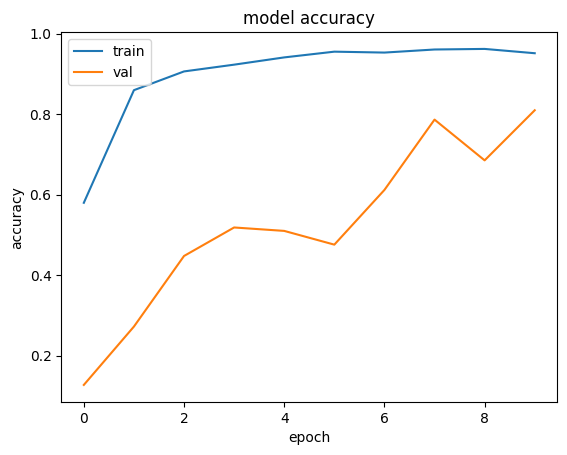

In [20]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

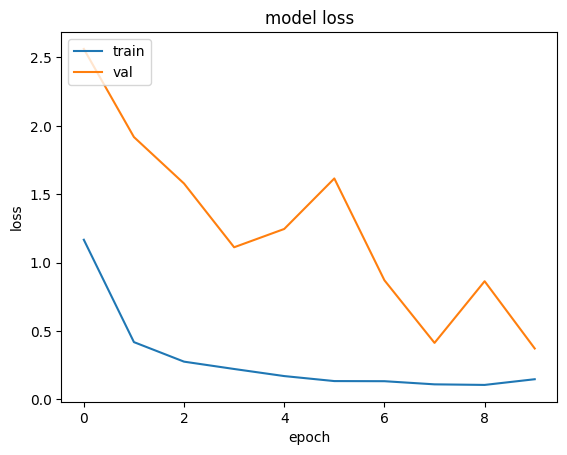

In [21]:
#plot of loss vs epoch

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [22]:
x_test=np.array(x_test).reshape(-1,28,28,3)

loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 1.0588 - accuracy: 0.7449 - 705ms/epoch - 11ms/step


In [23]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)


63/63 [==============================] - 1s 8ms/step


In [111]:
print(conf_mat)

[[  21   13   13    0    7    0    2]
 [  14   46   11    4   27    3    4]
 [  15   10  130    0   59    0   24]
 [   2    3    7    4    7    0    2]
 [  13    9  122    2 1110   16   69]
 [   0    2    2    0    0   20    0]
 [  11    6   44    1   76    7   65]]


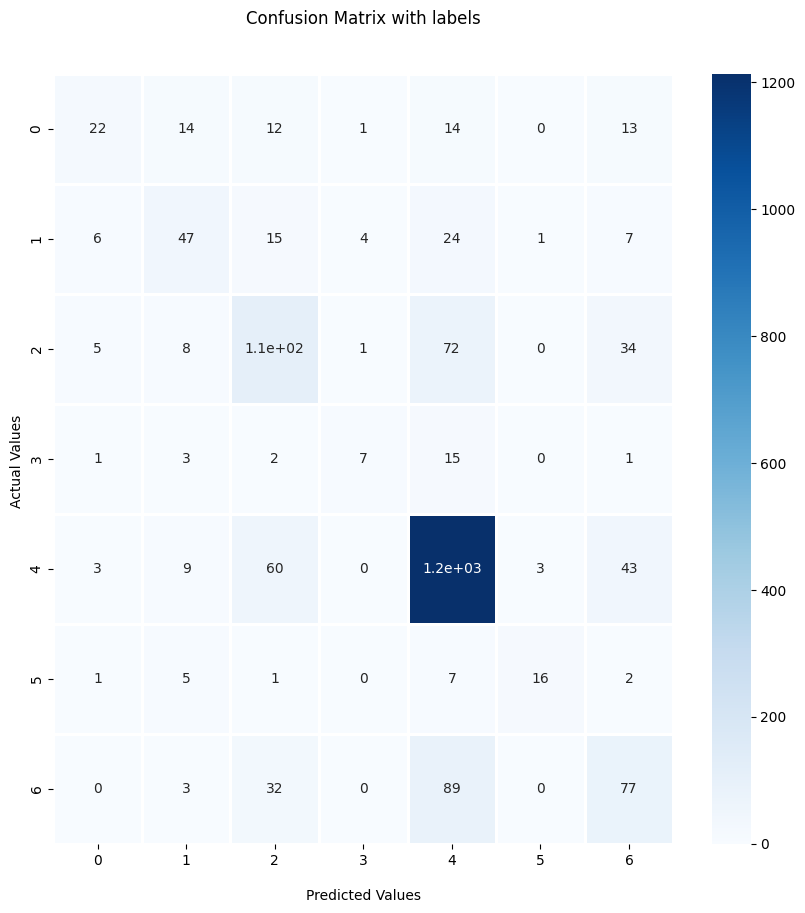

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

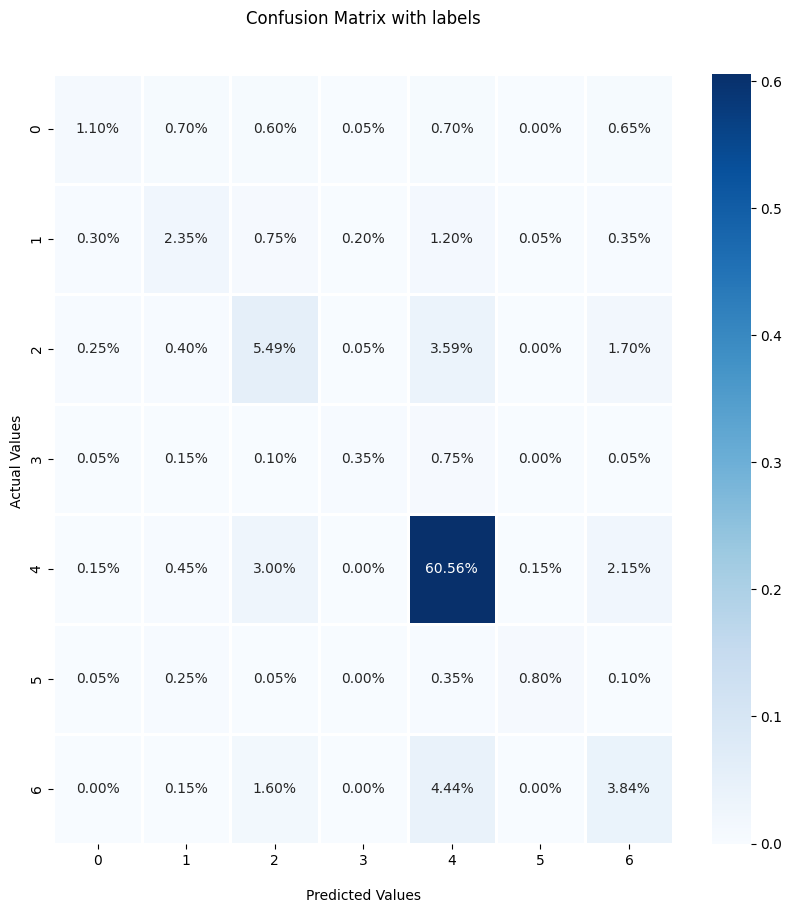

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 


ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [42]:

import PIL

image=PIL.Image.open('skin.jpg')

image=image.resize((28,28))

img=x_test[1]

img=np.array(image).reshape(-1,28,28,3)

result=model.predict(img)

print(result[0])

result=result.tolist()

max_prob=max(result[0])

class_ind=result[0].index(max_prob)

print(classes[class_ind])

1/1 [==============================] - 0s 19ms/step
[2.4907391e-03 4.1223238e-03 2.0445486e-04 2.2202150e-04 9.5951444e-01
 9.3139202e-04 3.2514568e-02]
('nv', 'melanocytic nevi')


In [41]:
import PIL

image=PIL.Image.open('test2.jpg')

image=image.resize((28,28))
img=x_test[1]

img=np.array(image).reshape(-1,28,28,3)

result=model.predict(img)

print(result[0])

result=result.tolist()

max_prob=max(result[0])

class_ind=result[0].index(max_prob)

print(classes[class_ind])

1/1 [==============================] - 0s 162ms/step
[1.70311111e-03 6.09852548e-04 2.58789390e-01 1.03157684e-01
 6.06055856e-01 4.76656598e-04 2.92074960e-02]
('nv', 'melanocytic nevi')


1/1 [==============================] - 0s 20ms/step
('mel', 'melanoma')


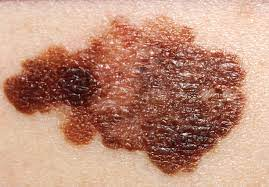

In [46]:
import PIL
from IPython.display import Image, display

image = PIL.Image.open('mela.jpg')

image = image.resize((28, 28))
img = np.array(image).reshape(-1, 28, 28, 3)

result = model.predict(img)
result = result.tolist()

max_prob = max(result[0])
class_ind = result[0].index(max_prob)
predicted_class = classes[class_ind]

print(predicted_class)

# Display the image with increased size
display(Image(filename='mela.jpg', width=400))




In [65]:
!pip install anvil-uplink


  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)



[notice] A new release of pip available: 22.2.1 -> 23.1.2
[notice] To update, run: E:\Python\python.exe -m pip install --upgrade pip


In [29]:
import anvil.server

anvil.server.connect("server_32OM6MV4GDN5RLTKHOM6UKVB-W6LDSIVFI35K7NML")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Published" as SERVER


In [48]:
import anvil.server
from PIL import Image
import numpy as np
import base64
import io


@anvil.server.callable
def classify_images(image_data_list):
    results = []

    for image_data in image_data_list:
        img_bytes = base64.b64decode(image_data)
        image = Image.open(io.BytesIO(img_bytes))

        image = image.resize((28, 28))
        img = np.array(image)
        img = img.reshape(-1, 28, 28, 3)
        img = img.astype('float32') / 255.0

        result = model.predict(img)
        result = result.tolist()

        max_prob = max(result[0])
        class_ind = result[0].index(max_prob)
        predicted_class = classes[class_ind]

        results.append(predicted_class)

    return results

1/1 [==============================] - 0s 31ms/step
